# Examen de Python (DU, 2023): Étude de polynômes

> + **Durée:** 2h
> + **Notebook final à envoyer** à la fin de l'examen à [romain.madar@cern.ch](mailto:romain.madar@cern.ch) et [louie.corpe@cern.ch](mailto:romain.madar@cern.ch)
> + **Documents permis:** documentation de [python](https://docs.python.org/3/), [numpy](https://numpy.org/devdocs/user/index.html), [matplotlib](https://matplotlib.org/contents.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/) et [scipy](https://docs.scipy.org/doc/scipy/reference/) avec également la documentation de l'interface du notebook en utlisant le raccourcis clavier `Shift+tab`, `help(module)` ou encore `help(function)`.
> 
> La note finale sera un nombre entre 0 (mauvaise note) et 20 (bonne note). L'évaluation de cet examen prend en compte l'exactitude des réponses mais aussi la clareté des explications fournies et la qualité du code. *Aucune connaissance sur les polynômes n'est nécessaire pour répondre aux questions de cet examen.*

## Informations générales

### Contexte

Les polynômes forment une classe de fonctions mathématiques utilisées (entres autres) en analyse de données pour différent aspects, comme par exemple des modélisations assez simples de certains phénomènes, ou encore des transformations des données à analyser afin d'extraire plus efficacement de l'information utile (*pre-processing*). Ce sujet propose une étude numérique de quelques polynômes.


### Organisation de l'examen

L'examen est séparé en deux parties, avec une troisième partie bonus. Dans la première partie, un polynôme de degré deux est étudié et dans la deuxième partie, des calculs numériques de dérivée et d'intégrale sont proposés. Enfin, la troisième partie - bonus- porte sur les polynômes de Lagrange, qui permettent d'interpoler facilement entre des points connus.


### Importation des packages et style par défaut des graphiques

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

## 1. [7 pts] Autour d'un polynôme de degré 2

Dans cette section, nous commençons par un polynôme de degré 2 passant par 3 points $(x_0, y_0)=(1, 1)$ et $(x_1, y_1)=(2, 1)$, $(x_2, y_2)=(3, 5)$ : 

$$
P_2(x) \;=\; \frac{1}{2}(x-2)(x-3) \;-\; (x-1)(x-3) \;+\; \frac{5}{2}(x-1)(x-2)
$$

**1.1 [1.5 pts]** Écrire une fonction python `P2(x)` qui prend en argument une valeur (ou une liste de valeurs) `x` et renvoie la (ou les) valeur(s) de $P_2(x)$. Vérifier que $P_2(x=1) = 1$, $P_2(x=2) = 1$ et $P_2(x=3) = 5$.

In [3]:
def P2(x):
    a1 =   0.5*(x-2)*(x-3)
    a2 = -     (x-1)*(x-3)
    a3 = 5./2.*(x-1)*(x-2)
    return a1 + a2 + a3

In [4]:
for x in [1, 2, 3]:
    print(f'P2({x}) = {P2(x)}')

P2(1) = 1.0
P2(2) = 1.0
P2(3) = 5.0


**1.2 [1.5 pts]** Tracer le graphique du polynome $P_2(x)$ en fonction $x$ pour $x$ compris entre $0$ et $4$.

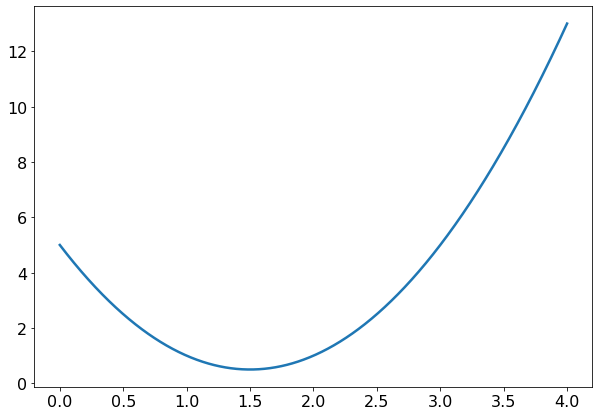

In [5]:
Xs = np.linspace(0, 4, 1000)
plt.plot(Xs, P2(Xs));

**1.3 [1.5 pts]** Ajouter à ce graphique les trois points $(x_0, y_0)=(1, 1)$ et $(x_1, y_1)=(2, 1)$, $(x_2, y_2)=(3, 5)$, avec une légende pour le polynôme $P_2(x)$ et pour les 3 points.

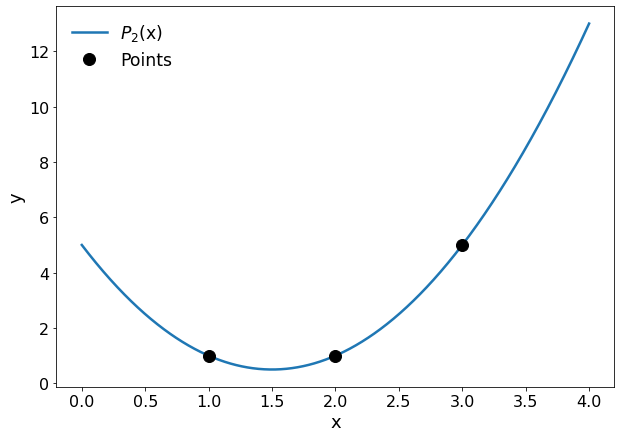

In [6]:
# Tracage du polynome
Xs = np.linspace(0, 4, 1000)
plt.plot(Xs, P2(Xs), label='$P_2$(x)')

# Tracage des 3 points
Xi, Yi = [1, 2, 3], [1, 1, 5]
plt.plot(Xi, Yi, 'o', markersize=12, color='black', label='Points')

# Ajout de la legende et des labels
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

**1.4 [2.5 pts]** Tracer sur ce même graphique chaque terme du polynôme $P_2(x)$, soit :
 + $a_1(x)=\frac{1}{2}(x-2)(x-3)$, 
 + $a_2(x)=-(x-1)(x-3)$,
 + $a_3(x) = \frac{5}{2}(x-1)(x-2)$ 

tel que $P_2(x) = a_1(x) + a_2(x) + a_3(x)$. Comment se comportent $a_2(x)$ et $a_3(x)$ au niveau du premier point $(1, 1)$ ?

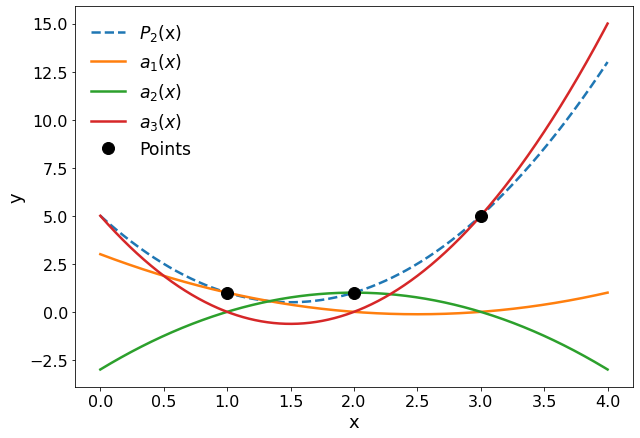

In [7]:
# Tracage du polynome
Xs = np.linspace(0, 4, 1000)
plt.plot(Xs, P2(Xs), '--', label='$P_2$(x)')

# Tracage de chaque terme
a1 = lambda x: 0.5*(x-2)*(x-3)
a2 = lambda x: -(x-1)*(x-3)
a3 = lambda x: 5/2.*(x-1)*(x-2)
plt.plot(Xs, a1(Xs), label='$a_1(x)$')
plt.plot(Xs, a2(Xs), label='$a_2(x)$')
plt.plot(Xs, a3(Xs), label='$a_3(x)$')

# Tracage des 3 points
Xi, Yi = [1, 2, 3], [1, 1, 5]
plt.plot(Xi, Yi, 'o', markersize=12, color='black', label='Points')

# Ajout de la legende et des labels
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

## 2. [13 pts] Dérivation et intégration numérique

**2.1 [2.5 pts]** Ecrire une fonction `derive(Xs, Ys)` qui calcule numériquement la dérivée $\Delta_i$ d'une fonction mathématique $f(x)$ à partir des $n$ valeurs discrètes $(x_i, y_i=f(x_i))$. Les formules suivantes indiquent l'expression de la dérivée :

$$
\Delta_0 \; = \; \frac{y_{1} - y_{0}}{x_{1} - x_{0}} ~~,~~ \Delta_1 \; = \; \frac{y_{2} - y_{1}}{x_{2} - x_{1}} ~~ ...~~ \Delta_i \; = \; \frac{y_{i+1} - y_{i}}{x_{i+1} - x_{i}} ~~...
$$

In [8]:
def derive(xs, ys):
    dy = ys[1:] - ys[:-1]
    dx = xs[1:] - xs[:-1]
    return dy/dx

**2.2 [1 pts]** Tester cette fonction avec les listes de nombres `Xs`et `Ys` utilisées pour faire le graphique de la question *1.2* ou *1.3* (si ces questions n'ont pas été traitées, on pourra utiliser d'autres listes de nombres, basées sur une fonction de son choix). Combien de valeurs contient la liste des derivées ?

In [9]:
# Derivee
dXdY = derive(Xs, P2(Xs))

# Imprimer la longeur du tableau
print( len(dXdY) )

999


**2.3 [1 pts]** Afin de tracer la derivée en fonction de $x$, il faut retravailler la liste de valeurs de $x$ pour que les deux aient la même dimension. On pourra considérer que la dérivée calculée $\Delta_i$ correspond à la valeur de la derivée en $\bar{x} = \frac{x_{i} \, + \, x_{i-1}}{2}$. Calculer la liste des $\bar{x}$ et tracer la dérivée en fonction de $\bar{x}$.

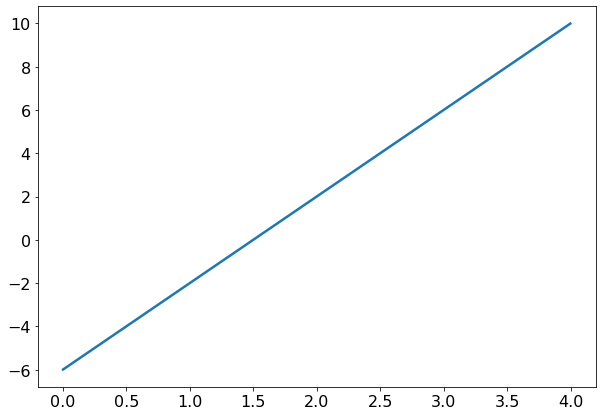

In [10]:
xbar = (Xs[1:] + Xs[0:-1]) / 2
plt.plot(xbar, dXdY);

**2.4 [2.5 pts]** Nous allons maintenant calculer numériquement l'intégrale d'une fonction mathématique $f(x)$, à partir des liste des $n$ valeurs discrètes $(x_i, y_i=f(x_i))$ : 

$$
\int^{x_n}_{x_0} f(x)dx \approx f(x_0) (x_1-x_0) + f(x_1) (x_2-x_1) + ... + f(x_{n-1}) (x_n-x_{n-1})
$$

Écrire une fonction python `integrale(xs, ys)` qui renvoie le résultat de l'intégrale (*i.e.* un nombre). On pourra procéder en 3 étapes : (1) écrire la liste des $f(x_i)$ s'arrêtant à $n-1$ (2) écrire la liste des $(x_{i}-x_{i-1})$, ou $i$ s'arrête à $n$, (3) effectuer la somme finale indiquée par l'équation ci-dessus.

Montrez alors que $\int^{4}_{0} P_2(x) dx = 14.65$.

In [11]:
def integrale(xs, ys):
    dxs = xs[1:] - xs[:-1]
    fxs = ys[:-1]
    return np.sum( fxs * dxs )

print(f'Integrale de P2(x) entre 0 et 4 = {integrale(Xs, P2(Xs)):.2f}')

Integrale de P2(x) entre 0 et 4 = 14.65


**2.3 [6 pts]** Le but de cette question est d'estimer la précision du calcul numérique de la dérivée en fonction du nombre de valeurs discrètes utilisées $n$ (échantillonage), et ce sur quatre fonctions différentes. Pour ce faire, un jeu de données est fourni sous forme d'un fichier `csv` appelé `derivative_data.csv` et qui contient 8 colonnes : la valeur de la dérivée exacte en un certain point pour chacune des 4 fonctions, ainsi que les estimations numériques en ce même point pour chacune des 4 fonctions. Toutes ces valeurs sont données pour plusieurs valeurs de $n$.

  + **a. [1 pts]** Charger le fichier sous la forme d'un `dataframe` et déterminer combien de valeurs de $n$ ont été considérées dans cette étude ? Donner la plus petite et la plus grande valeur de $n$ du jeu de données fourni.
  
  + **b. [1.5 pts]** Ajouter une colonne par fonction au dataframe contenant la différence relative, exprimée en %, entre les prédictions et les résultats exacts : `(prediction-exact)/exact * 100`
  
  + **c. [1.5 pts]** Tracer sur un même graphique l'évolution du logarithme de la différence relative en fonction de $n$ pour chaque fonction.
  
  + **d. [2 pts]** Pour chacune des 4 fonctions, déterminer la valeur de $n$ à partir de laquelle la précision est meilleure que $0.01\%$.

In [12]:
df = pd.read_csv('derivative_data.csv')
df.describe()

# 1000 valeurs sont donnees entre 100 points et 100000 points.

,n,predite_f1,exact_f1,predite_f2,exact_f2,predite_f3,exact_f3,predite_f4,exact_f4
count,1000.00000,1000.000000,1000.0,1000.000000,1000.0,1000.000000,1000.0,1000.000000,1000.0
mean,50050.00000,11.000900,11.0,26.005415,26.0,50.016282,50.0,85.037478,85.0
std,28881.94361,0.004820,0.0,0.029166,0.0,0.088194,0.0,0.204156,0.0
min,100.00000,11.000120,11.0,26.000720,26.0,50.002160,50.0,85.004960,85.0
25%,25075.00000,11.000160,11.0,26.000960,26.0,50.002879,50.0,85.006612,85.0
50%,50050.00000,11.000240,11.0,26.001439,26.0,50.004316,50.0,85.009911,85.0
75%,75025.00000,11.000479,11.0,26.002872,26.0,50.008615,50.0,85.019784,85.0
max,100000.00000,11.121212,11.0,26.735435,26.0,52.229556,50.0,90.174440,85.0


In [13]:
fct_name = [f'f{i+1}' for i in range(4)]

for c in fct_name:
    df['reldiff_'+c] = (df['predite_'+c] - df['exact_'+c]) / df['exact_'+c] * 100

df.head()

,n,predite_f1,exact_f1,predite_f2,exact_f2,predite_f3,exact_f3,predite_f4,exact_f4,reldiff_f1,reldiff_f2,reldiff_f3,reldiff_f4
0,100,11.121212,11,26.735435,26,52.229556,50,90.174440,85,1.101928,2.828597,4.459112,6.087577
1,200,11.060302,11,26.363829,26,51.097193,50,87.532795,85,0.548196,1.399343,2.194385,2.979759
2,300,11.040134,11,26.241698,26,50.727612,50,86.676679,85,0.364853,0.929606,1.455225,1.972564
3,400,11.030075,11,26.180954,26,50.544274,50,86.253099,85,0.273411,0.695976,1.088548,1.474234
4,500,11.024048,11,26.144610,26,50.434732,50,86.000371,85,0.218619,0.556192,0.869465,1.176907


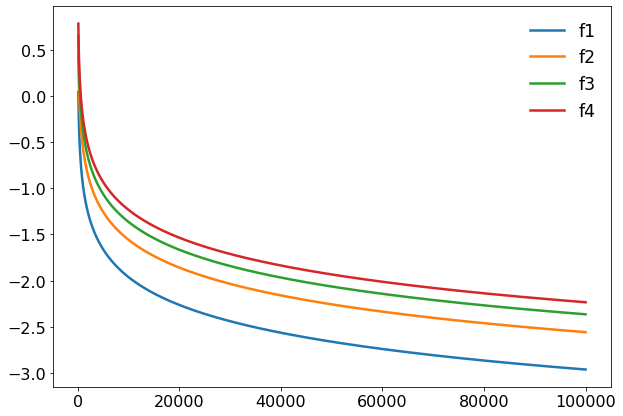

In [14]:
for c in fct_name:
    plt.plot(df.n, np.log10(df['reldiff_'+c]), label=c )
plt.legend();

In [15]:
for c in fct_name:
    diff = df['reldiff_'+c].values
    Ns = df.n.values
    Ngood = Ns[diff<0.01]
    print(f'{c} --> {Ngood[0]}')

f1 --> 11000
f2 --> 27700
f3 --> 43300
f4 --> 58400


## 3. [Bonus 6 pts] Polynômes de Lagrange


Le polynôme de la partie 1. fait parti d'une classe de polynômes, appelée polynômes de Lagrange qui permettent de définir une fonction polynômiale qui interpole entre plusieurs points connus. Il se trouve que le polynôme $P_2(x)$ étudié dans la partie 1 peut également s'écrire:

$$
P_2(x) \;=\; y_0 \left(\frac{x-x_1}{x_0-x_1}\right)\left(\frac{x-x_2}{x_0-x_2}\right) \;+\; y_1 \left(\frac{x-x_0}{x_1-x_0}\right)\left(\frac{x-x_2}{x_1-x_2}\right) \;+\; y_2 \left(\frac{x-x_0}{x_2-x_0}\right)\left(\frac{x-x_1}{x_2-x_1}\right)
$$

Cette forme permet alors d'être facilement généralisable à un degré quelconque. En effet, le polynôme de Lagrange de degré $n$ est une fonction polynômiale passant par $n$ points fixés $(x_i, y_i)$, et peut s'écrire de la manière suivante:

$$
P_{n}(x) = \sum^{n-1}_{i=0} y_i \times \mathcal{L}_i(x)
$$

avec $\mathcal{L}_i(x)$ est une fonction qui vaut $1$ en $x_i$ et $0$ partout ailleurs :

$$
\mathcal{L}_i(x) = \prod_{j \neq i} \frac{x-x_j}{x_i-x_j}
$$

**3.1 [2 pts]** Écrire une fonction python `PolynomeLagrange(points, x)` qui prend en argument une liste de $n$ points $(x_i, y_i)$ et une valeur $x$, et qui renvoie la valeur du polynôme qui passe par les $n$ points, évalué en $x$.

In [15]:
def PolynomeLagrange(xys, x):
    
    '''
    xys = [ [x0, y0], [x1, y1], ... [xn, yn] ]
    x : float or array.
    '''
    
    # Get the x's and y's for all points
    N  = len(xys)
    xs = [p[0] for p in xys]
    ys = [p[1] for p in xys]
    
    # Loop over (i, j) and compute each term
    res = 0
    for i in range(N):
        prod = 1
        for j in range(N):
            if j!=i: prod *= (x - xs[j]) / (xs[i] - xs[j])
        res += ys[i] * prod
    
    # Return the result
    return res

**3.2 [1 pts]** Tester cette fonction avec les points $(x_i, y_i)$ de la première partie, en tracant $P_2(x)$ en fonction de $x$, obtenu à partir de `PolynomeLagrange(points, x)`.

In [16]:
# Definition of the points
xys = [ [1, 1], [2, 1], [3, 5] ]

# Printing the fixed values
for x in [1, 2, 3]:
    print(f'Lagrange({x}) = {PolynomeLagrange(xys, x)}')

Lagrange(1) = 1.0
Lagrange(2) = 1.0
Lagrange(3) = 5.0


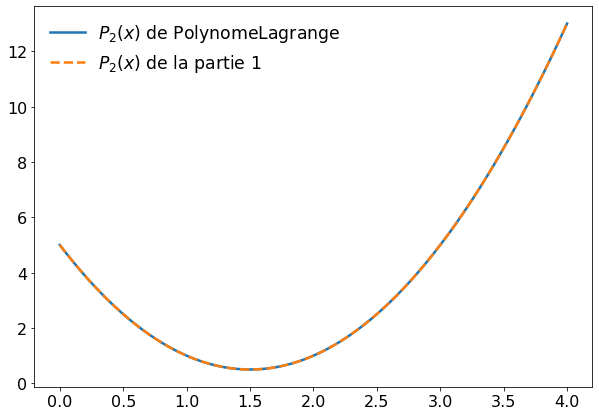

In [17]:
# Xs and Ys computed from the general function
Xs = np.linspace(0, 4, 1000)
Ys = PolynomeLagrange(xys, Xs)

# Plotting
plt.plot(Xs, Ys, label='$P_2(x)$ de PolynomeLagrange')
plt.plot(Xs, P2(Xs), '--', label='$P_2(x)$ de la partie 1')
plt.legend();

**3.3 [3 pts]** Nous allons maintenant utiliser cette fonction générique pour déterminer une interpolation entre des points de mesure, c'est-à-dire une fonction mathématique qui relie en ensemble de points connus, entres eux. Voici les 20 points que nous allons considérer:

In [18]:
xdata = np.linspace(-5, 3.0, 20)
ydata = 2*(np.sin(x/2)**2 + np.random.random(20)*0.3)

  + **a. [1 pts]** Tracer les points sur un graphique.
  + **b. [1 pts]** Tracer le polynôme de Lagrange passant par ces 20 points
  + **c. [1 pts]** Pensez-vous que c'est une interpolation satisfaisante ?

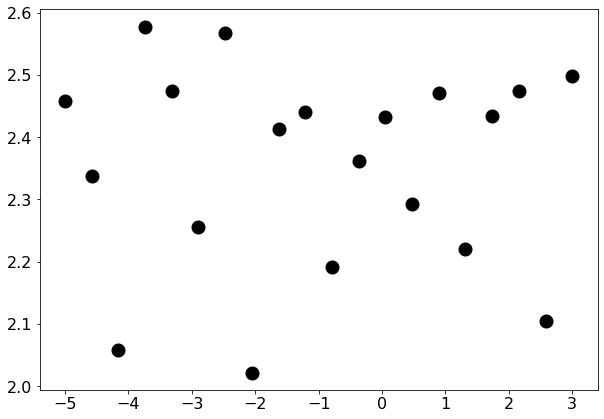

In [19]:
# a
plt.plot(xdata, ydata, 'o', color='black', markersize=13);

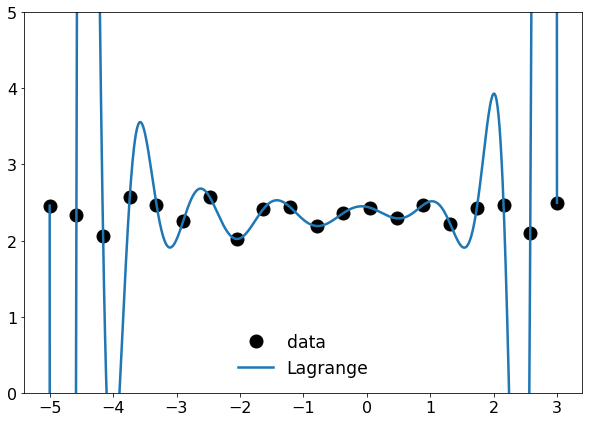

In [20]:
# b.
xys = [[a, b] for a, b in zip(xdata, ydata)]
Xs = np.linspace(-5, 3.0, 1000)
Ys = PolynomeLagrange(xys, Xs)
plt.plot(xdata, ydata, 'o', color='black', markersize=13, label='data')
plt.plot(Xs, Ys, label='Lagrange')
plt.ylim(0, 5)
plt.legend();